# Pillow PIL图像库测试

In [127]:
# 引入相关库
from PIL import Image, ImageEnhance, ImageDraw, ImageFont
import os, random

图片格式：PNG	图片大小：400x160


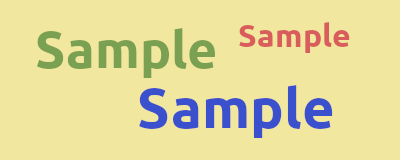

In [128]:
# 打开源文件
im = Image.open('sample.png')

print('图片格式：{0}\t图片大小：{1}x{2}'.format(im.format, im.width, im.height))
display(im)

缩略图大小：120x48


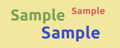

In [129]:
# 复制一个图片对象副本
im2 = im.copy()

# 生成缩略图，尺寸不大于120x120
im2.thumbnail((120,120))

print('缩略图大小：{0}x{1}'.format(im2.width, im2.height))
display(im2)

In [130]:
# 保存缩略图(jpg/jpeg格式)
thumb_file_path = os.path.splitext('sample.png')[0] + '_thumbnail.jpg'

try:
    im2.convert('RGB').save(thumb_file_path, 'JPEG')
    print('缩略图【{}】已保存。'.format(thumb_file_path))
except IOExcept:
    print('IO异常！缩略图【{}】保存失败。'.format(thumb_file_path))
    pass

缩略图【sample_thumbnail.jpg】已保存。


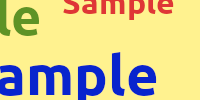

In [131]:
# 截取图片随机区域（100x80）
left = random.randint(0, im.width - 200)
top = random.randint(0, im.height - 100)
box = (left, top, left + 200, top + 100)
region = im.crop(box)

# 随机改变对比度
region = ImageEnhance.Contrast(region).enhance(random.random()+0.5)

display(region)

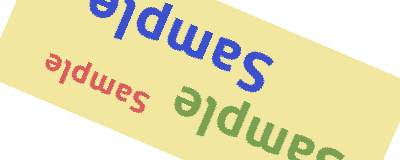

In [132]:
# 源图旋转随机角度
im3 = im.rotate(random.randint(0, 360), fillcolor=(255,255,255,0))

display(im3)

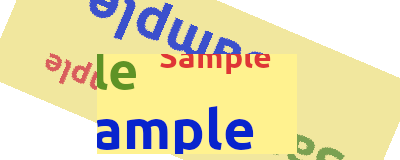

In [133]:
# 随机叠加截取图片区域
im3.paste(
    region,
    (
        random.randint(0, im3.width - region.width), 
        random.randint(0, im3.height - region.height), 
    )
)

display(im3)

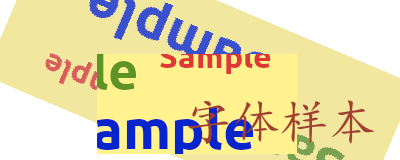

In [134]:
# 随机位置添加文字
f = ImageFont.truetype('../matplotlib中文字体显示问题/CESI_KT_GB2312.TTF', size=48)
d = ImageDraw.Draw(im3)
d.text((random.randint(0, im.width-200), random.randint(0, im.height-30)), '字体样本', font=f, fill=(160,64,48))

display(im3)

In [135]:
# 保存处理后的图片(jpg/jpeg格式)
file_path = os.path.splitext('sample.png')[0] + '_result.jpg'

try:
    im3.convert('RGB').save(file_path, 'JPEG')
    print('图片【{}】已保存。'.format(file_path))
except IOExcept:
    print('IO异常！图片【{}】保存失败。'.format(file_path))
    pass

图片【sample_result.jpg】已保存。
